# Vision Results - BrainScore Analysis
## Figure 7B

Plots the Metamer Recognizability vs. the BrainScore values obtained for each Visual Region

In [1]:
import numpy as np
import pandas as pd
import os 
import glob
import math
import json
import scipy
import scipy.stats
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib
import pickle as pckl
from PIL import Image
import seaborn as sns

import urllib.request, json
from scipy.io import loadmat
import random

import sys
from model_analysis_folders import all_model_info

from notebooks.notebook_helpers import responses_network_by_layer_mat, combined_experiment_response_dictionaries, unpack_experiment_mat

from notebooks.vision_brainscore_notebook_helpers import * 

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams.update({'font.size': 7})


In [2]:
from model_analysis_folders import all_model_info
from model_analysis_folders import color_model_info

all_networks_and_layers = all_model_info.ALL_NETWORKS_AND_LAYERS_IMAGES

models_to_evaluate = color_model_info.visual_models_to_plot
model_cmap_dict = color_model_info.visual_model_cmap_dict
model_style_dict = color_model_info.visual_model_style_dict

## Load in the CSV with the Brainscore Results
### These were obtained from the BrainScore submission website on 10/26/2022


In [3]:
brainscore_results = '2022_10_26_Metamers_Paper_Brainscore_Model_Tracking.csv'
brainscore_df = pd.read_csv(brainscore_results)

In [4]:
# Load in the metamer recogntion values for the experiments
experiment_list = [1,5,3,4,9,10,12,16] 
all_experiment_dictionaries = []

for exp_num in experiment_list:
    experiment_name = all_model_info.TURK_IMAGE_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['paper_experiment_name']
    jsin_configs = all_model_info.TURK_IMAGE_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['experiment_params_web']

    with urllib.request.urlopen(jsin_configs) as url:
        experiment_params = json.loads(url.read().decode())

    plot_model_order = experiment_params['experiment_info']['networks']
    
    exp_response_dict = {}
    for n_idx, network in enumerate(experiment_params['experiment_info']['networks']):
        participant_data_matrix, model_layers, conditions, participants = unpack_experiment_mat(
            '../VisionBehavioralExperiments/EXP%d_ANALYSIS/VisionExperiment%d_network_vs_humans_datamatrix_%s_public.mat'%(exp_num, exp_num, network))
        exp_response_dict[network] = responses_network_by_layer_mat(participant_data_matrix, model_layers, conditions, experiment_params)

    all_experiment_dictionaries.append(exp_response_dict)

combined_experiment_dict = combined_experiment_response_dictionaries(all_experiment_dictionaries)


### V1 ###
### V2 ###
### V4 ###
### IT ###


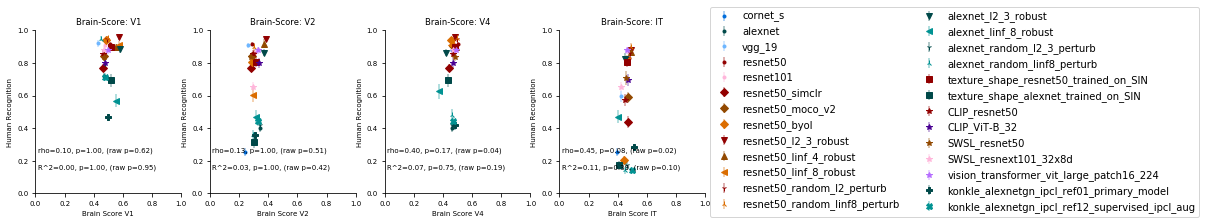

In [5]:
plot_brainscore_analysis_scatter(brainscore_df, 
                                     models_to_evaluate,
                                     model_cmap_dict,
                                     model_style_dict,
                                     combined_experiment_dict,
                                     brain_comparisons = ['V1', 'V2', 'V4', 'IT'])